# Import o flibraries and necessary functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None) #para que se muestren todas las filas en lugar de los "..."
pd.set_option('display.max_columns', None) #para que se muestren todas las columnas en lugar de los "..."

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

# Load data

Dividimos el dataset en train y test (habrá que cambiar esto en el futuro ya que se tendra que coger los mismos datos de uno y del otro

In [2]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('../Datasets/merged_socialdata_placesinfo_starbucksdata.csv')

interested_columns = ['revenue', 'storenumber', 'aerports', 'hostelry', 'schools', 'banks', 'sanity', 'spectacles', 'police_stations', 'temples', 'stadiums', 'stations', 'malls', 'fashion_shops', 'parks', 'gyms', 'hotels', 'attractions']

full_df = full_df[interested_columns]

In [3]:
# Eliminamos las revenue que son NAN ya que esas ahora mismo no nos interesan
full_df = full_df.dropna()

In [4]:
full_df.head()

revenue   storenumber  aerports  hostelry  schools  banks  sanity  \
0  743729.570782  54804-288519         0        16       13      1       3   
1  796300.705992  23591-231287         0        16       13      1       3   
2  970944.819270  16153-155504         0        16       13      1       3   
3  584694.999061  76878-100172         0         1       12      0       5   
4  695347.793250    9721-97945         0         1       12      0       5   

   spectacles  police_stations  temples  stadiums  stations  malls  \
0           0                3        0         0         0      3   
1           0                3        0         0         0      3   
2           0                3        0         0         0      3   
3           1                0        0         0         2      1   
4           1                0        0         0         2      1   

   fashion_shops  parks  gyms  hotels  attractions  
0              0     25     3       0            0  
1              0     25     3       0            0  
2              0     25     3       0            0  
3              0      8     1       0            0  
4              0      8     1       0            0

In [5]:
stores_for_train = np.load('../Datasets/storenumbers_splitted/stores_for_train.npy')

# Guardamos
train = full_df[full_df['storenumber'].isin(stores_for_train)]
train = train.drop(['storenumber'], axis=1)

print(f'Dimensiones del dataset de training: {train.shape}')
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = train.copy()

Dimensiones del dataset de training: (132, 17)


In [6]:
df.head().T

0              1             2              3  \
revenue          743729.570782  796300.705992  970944.81927  584694.999061   
aerports              0.000000       0.000000       0.00000       0.000000   
hostelry             16.000000      16.000000      16.00000       1.000000   
schools              13.000000      13.000000      13.00000      12.000000   
banks                 1.000000       1.000000       1.00000       0.000000   
sanity                3.000000       3.000000       3.00000       5.000000   
spectacles            0.000000       0.000000       0.00000       1.000000   
police_stations       3.000000       3.000000       3.00000       0.000000   
temples               0.000000       0.000000       0.00000       0.000000   
stadiums              0.000000       0.000000       0.00000       0.000000   
stations              0.000000       0.000000       0.00000       2.000000   
malls                 3.000000       3.000000       3.00000       1.000000   
fashion_shops         0.000000       0.000000       0.00000       0.000000   
parks                25.000000      25.000000      25.00000       8.000000   
gyms                  3.000000       3.000000       3.00000       1.000000   
hotels                0.000000       0.000000       0.00000       0.000000   
attractions           0.000000       0.000000       0.00000       0.000000   

                            4  
revenue          695347.79325  
aerports              0.00000  
hostelry              1.00000  
schools              12.00000  
banks                 0.00000  
sanity                5.00000  
spectacles            1.00000  
police_stations       0.00000  
temples               0.00000  
stadiums              0.00000  
stations              2.00000  
malls                 1.00000  
fashion_shops         0.00000  
parks                 8.00000  
gyms                  1.00000  
hotels                0.00000  
attractions           0.00000

In [7]:
df.describe()

revenue    aerports    hostelry     schools       banks  \
count  1.320000e+02  132.000000  132.000000  132.000000  132.000000   
mean   1.353675e+06    0.113636   56.022727   14.704545    6.931818   
std    9.173560e+05    0.787766   86.217767   10.053854    8.152359   
min    2.027340e+05    0.000000    0.000000    1.000000    0.000000   
25%    6.066836e+05    0.000000    6.000000    8.000000    1.000000   
50%    1.079234e+06    0.000000   24.500000   12.500000    4.000000   
75%    2.006609e+06    0.000000   49.000000   19.000000   10.000000   
max    4.257652e+06    8.000000  331.000000   50.000000   32.000000   

           sanity  spectacles  police_stations     temples    stadiums  \
count  132.000000  132.000000       132.000000  132.000000  132.000000   
mean     5.901515    1.348485         0.628788    0.037879    0.265152   
std      6.904871    1.886007         0.823373    0.259339    0.739918   
min      0.000000    0.000000         0.000000    0.000000    0.000000   
25%      1.000000    0.000000         0.000000    0.000000    0.000000   
50%      3.000000    1.000000         0.000000    0.000000    0.000000   
75%      8.000000    2.000000         1.000000    0.000000    0.000000   
max     24.000000   10.000000         4.000000    2.000000    5.000000   

         stations       malls  fashion_shops       parks        gyms  \
count  132.000000  132.000000     132.000000  132.000000  132.000000   
mean     2.651515    1.856061       9.863636   14.340909    5.492424   
std      3.514387    3.278737      20.767257    9.634408    8.957488   
min      0.000000    0.000000       0.000000    0.000000    0.000000   
25%      0.000000    0.000000       0.000000    7.000000    1.000000   
50%      1.000000    1.000000       1.000000   12.000000    2.000000   
75%      4.000000    2.000000       7.250000   18.250000    5.000000   
max     15.000000   28.000000      81.000000   53.000000   36.000000   

           hotels  attractions  
count  132.000000   132.000000  
mean     1.878788     0.606061  
std      3.986677     2.085052  
min      0.000000     0.000000  
25%      0.000000     0.000000  
50%      1.000000     0.000000  
75%      2.000000     0.000000  
max     36.000000    16.000000

Podemos ver que los barrios son muy diversos, tenemos por ejemplo que hay barrios sin ninguna tienda de ropa y otras con 141, de media hay los barrios tienen 2 centros comerciales y otro con 28. 
Habrá que ver como se dispersan los datos.

## Como estan erlacionadas entre ellas las variables

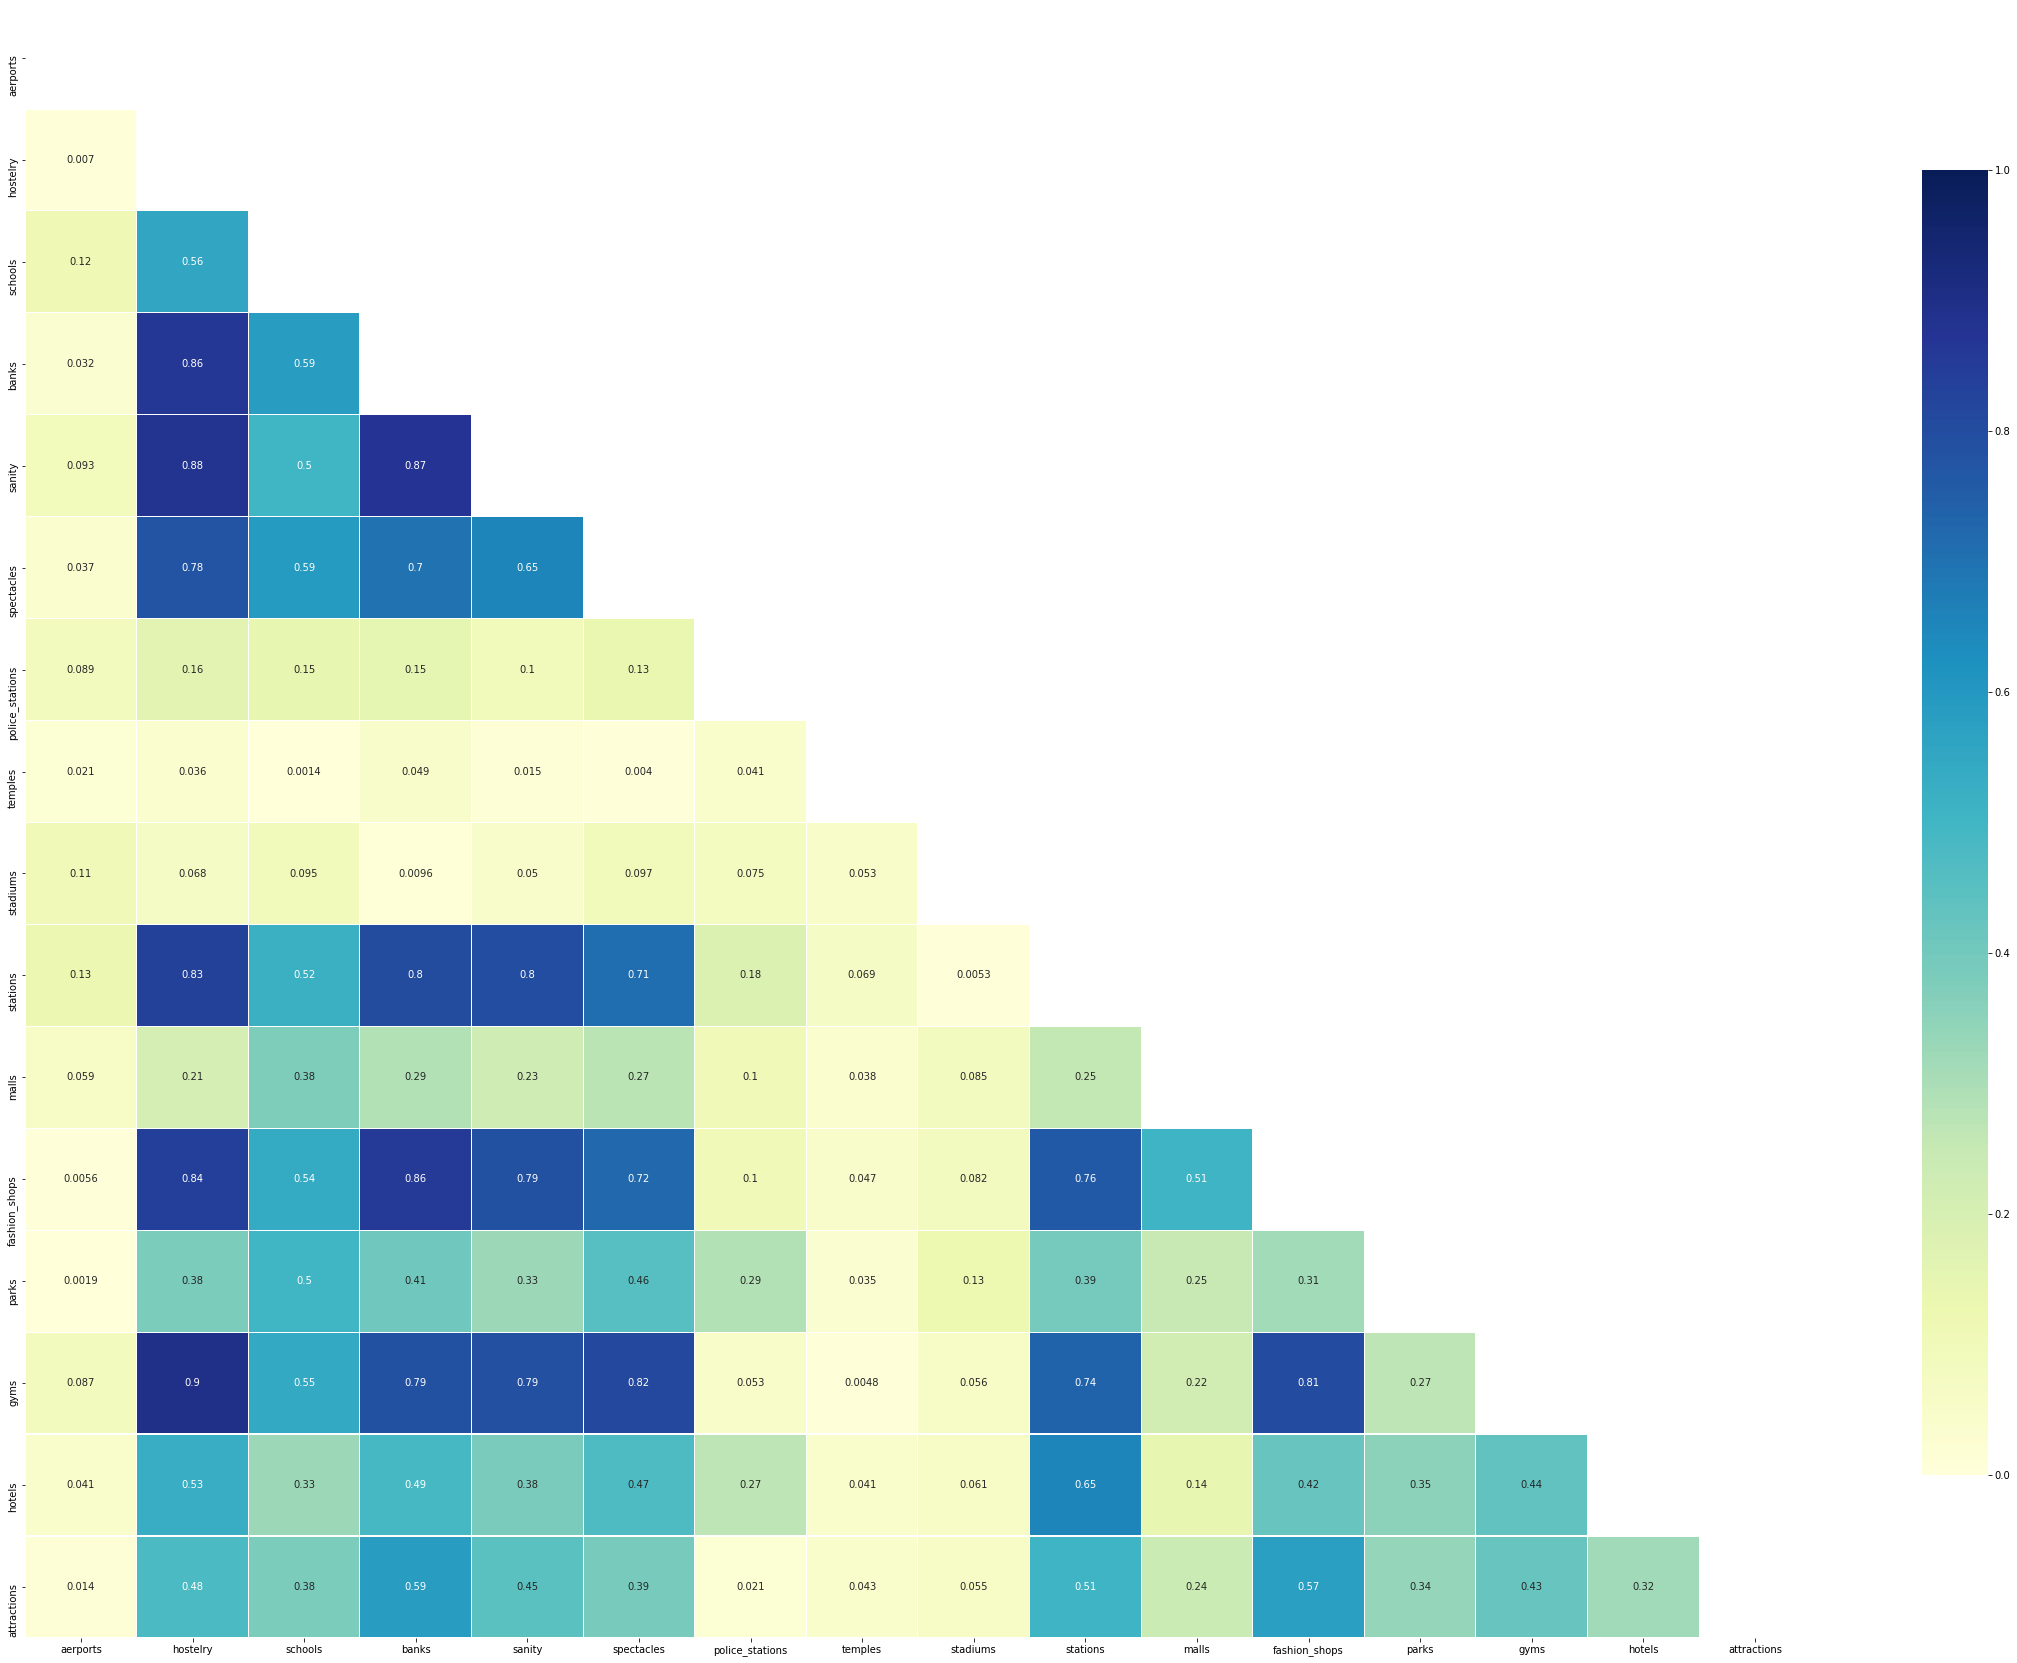

In [8]:
# Compute the correlation matrix
corr = np.abs(df.drop(['revenue'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 30))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8}, annot=True)

plt.show()

Parece que la hosteleria esta muy relacionada con los gimnasios, las tiendas de ropa, los estadios, los centros sanitarios y los bancos.
Como parametro voy a estableces que hace falta más un 85% de relación para descartarla.
La hosteleria y los gimnasios tienen un 87%
El triangulo hostelería,centros sanitarios y los bancos tienen mas de un 85%

In [9]:
df.drop(['sanity','banks','gyms'], axis=1, inplace=True)

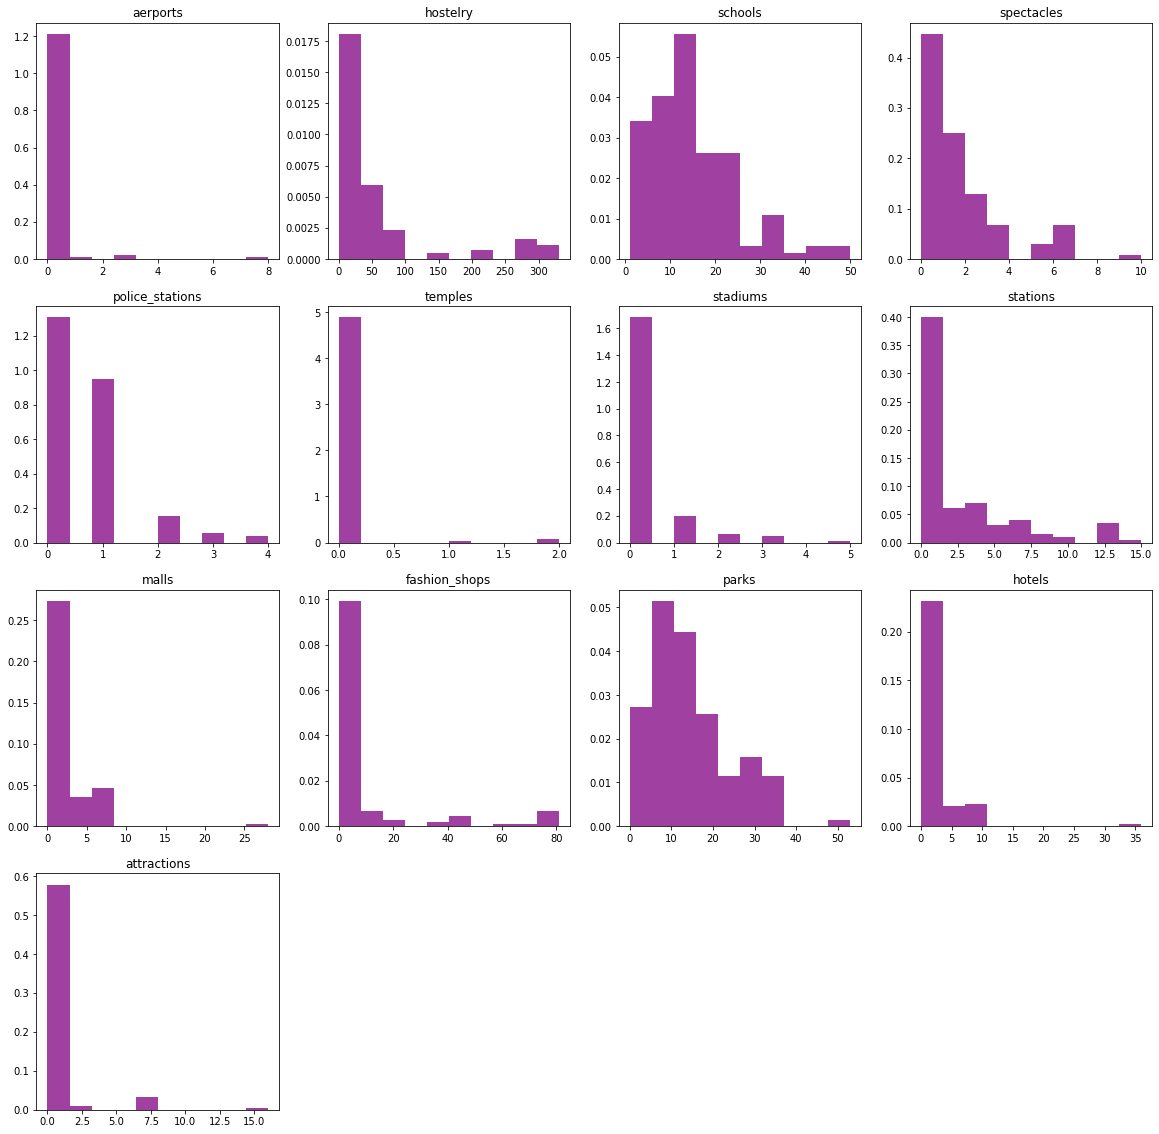

In [10]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(df.columns.drop(['revenue'])):
    plt.subplot(4, 4, i+1)   
    plt.hist(df[feature], density=1, facecolor='purple', alpha=0.75)
    plt.title(feature)

plt.show()

Parece que la mayoria de elementos (excepto parques y escuelas) tiene zero elementos de esa categoría

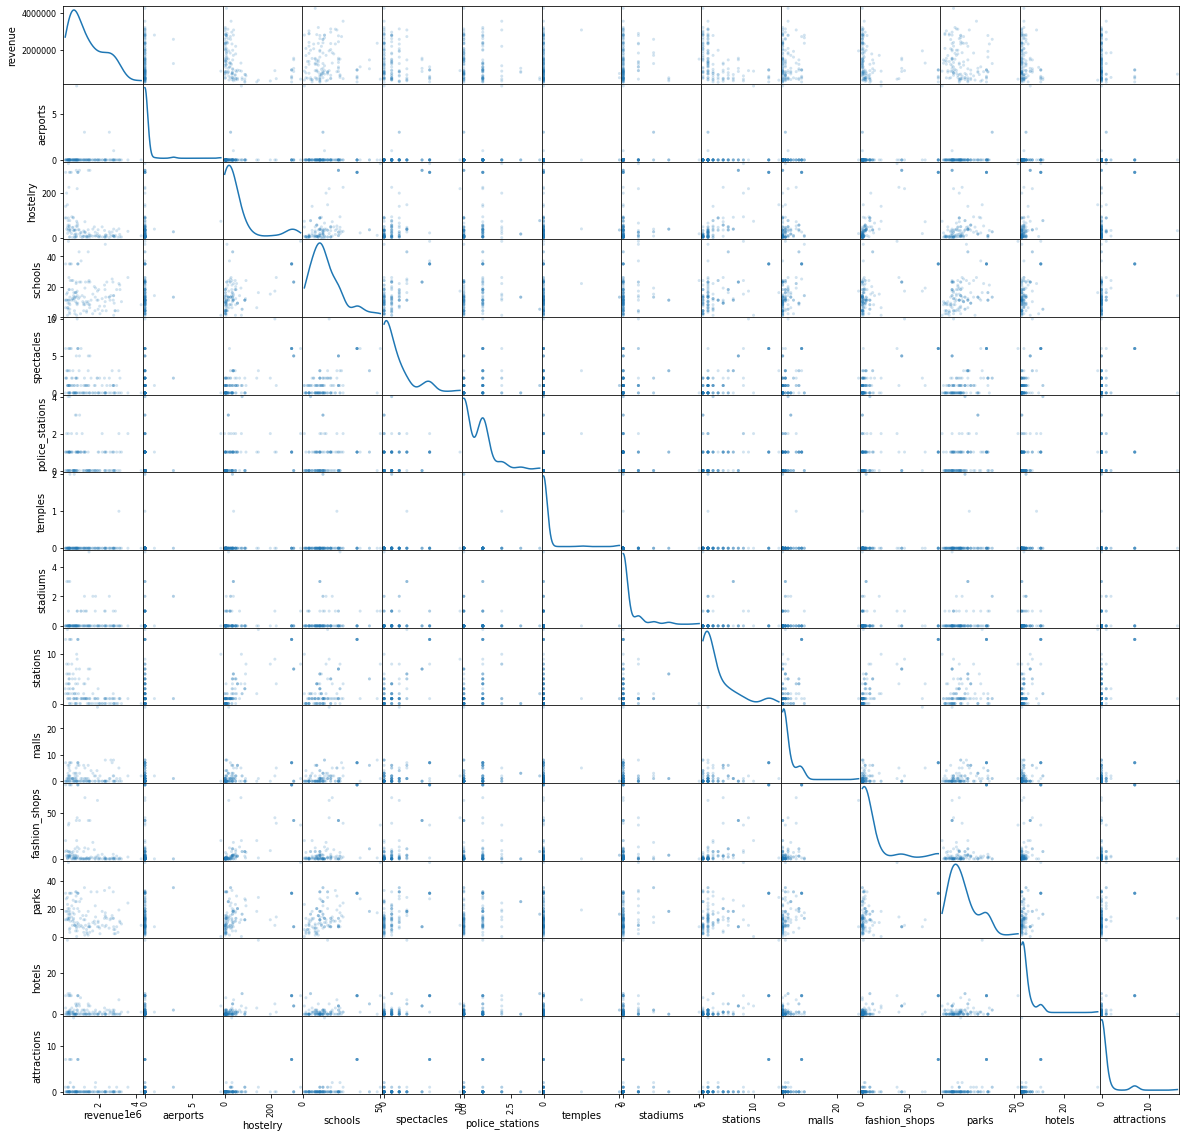

In [11]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [12]:
aux = pd.DataFrame()
for variable in (['aerports', 'hostelry', 'schools', 'banks', 'sanity', 'spectacles', 'police_stations', 'temples', 'stadiums', 'stations', 'malls', 'fashion_shops', 'parks', 'gyms', 'hotels', 'attractions']):
    aux = aux.append({'variable': variable,
                      'correlation_with_revenue': (train[variable].corr(train['revenue'])),
                      'abs_correlation_with_revenue': np.abs(train[variable].corr(train.revenue))},ignore_index = True)
aux.sort_values(by = 'abs_correlation_with_revenue',ascending  = False, inplace = True,axis = 0)
aux.reset_index(drop = True, inplace = True)

for i in range(1,aux.shape[0]):
    print(aux.loc[i, 'variable'])

stations
hostelry
banks
fashion_shops
spectacles
gyms
hotels
parks
attractions
police_stations
schools
temples
stadiums
malls
aerports


In [13]:
aux

abs_correlation_with_revenue  correlation_with_revenue         variable
0                       0.460338                 -0.460338           sanity
1                       0.452571                 -0.452571         stations
2                       0.367283                 -0.367283         hostelry
3                       0.359005                 -0.359005            banks
4                       0.259450                 -0.259450    fashion_shops
5                       0.254904                 -0.254904       spectacles
6                       0.247057                 -0.247057             gyms
7                       0.230786                 -0.230786           hotels
8                       0.226774                 -0.226774            parks
9                       0.194166                 -0.194166      attractions
10                      0.161831                 -0.161831  police_stations
11                      0.069467                 -0.069467          schools
12                      0.045619                 -0.045619          temples
13                      0.023143                 -0.023143         stadiums
14                      0.010298                 -0.010298            malls
15                      0.003853                  0.003853         aerports

In [14]:
test = full_df[~full_df['storenumber'].isin(stores_for_train)]
test = test.drop(['storenumber'], axis=1)
print(f'Dimensiones del dataset de test: {test.shape}')
df_test = test.copy()

df_test.drop(['sanity','banks','gyms'], axis=1, inplace=True)

Dimensiones del dataset de test: (45, 17)


In [15]:
df_test.head()

revenue  aerports  hostelry  schools  spectacles  police_stations  \
9   8.702435e+05         0        30        9           0                2   
15  1.100743e+06         0        28       13           0                1   
26  3.855217e+06         0         8        5           1                1   
29  1.220818e+06         0         7       19           0                0   
31  1.102339e+06         0         7       19           0                0   

    temples  stadiums  stations  malls  fashion_shops  parks  hotels  \
9         0         2         3      1              0      8       0   
15        0         2         0      2              2      8       0   
26        0         0         1      0              0      3       0   
29        0         2         1      2              2     14       2   
31        0         2         1      2              2     14       2   

    attractions  
9            17  
15            0  
26            0  
29            2  
31            2

# Preparamos los datos para train y test

In [16]:
from sklearn import preprocessing

data_values = df.values
y_train = data_values[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_values[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [17]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

# Árbol de decisión

best mean cross-validation score: -0.038
best parameters: {'max_depth': 1}


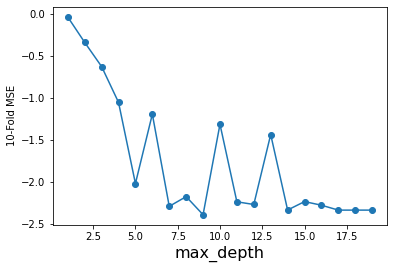

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


# Tu código aquí
maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

# Random forest

best mean cross-validation score: -0.092
best parameters: {'max_depth': 1}


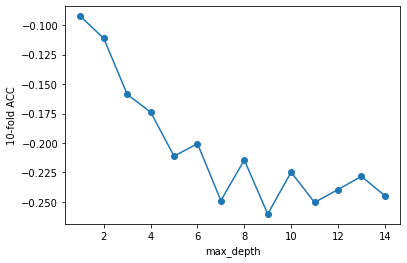

In [19]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [20]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.26880954991118655
Test:  0.21710998159808625


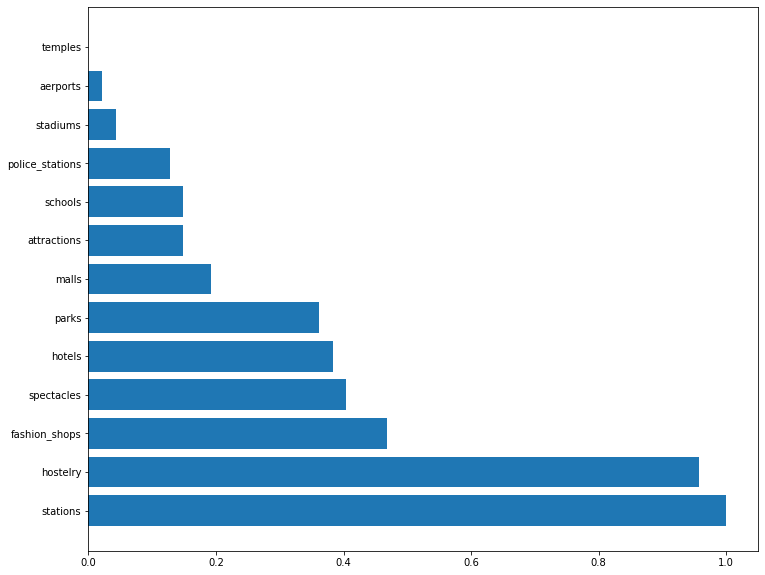

In [21]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Random forest nos dice que las columnas mas interesantes son las de hostelería

##  Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Estos son parametros libres yo los utilizo asi ya que los he copiado pero bueno... entiendo que es para la práctica
Niterations = [100,125,250, 500,1000,1500,2000]
learningRate = [0.1,0.05, 0.01, 0.005, 0.001]

param_gbr_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_gbr_grid, cv = 5)
gbr_grid.fit(X_train, y_train.ravel())
print("best mean cross-validation score: {:.3f}".format(gbr_grid.best_score_))
print("best parameters: {}".format(gbr_grid.best_params_))

In [ ]:
lrOptimo = gbr_grid.best_params_['learning_rate']
neOptimo = gbr_grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train.ravel())

error = 1-gbr_grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
# Para este podemos ver las importancias de las variables
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

Si comparamos esta tabla con la de Random forest con las de gradien boosting las dos difieren un poco.
Para la siguiente fase se poropone utilizar la combinación de las 6 primeras columnas de ambos.
Estas columnas son: stations, school, fashion_shops, stadiums, hostelry, parks, hotels y spectacles